In [72]:
import torch as t
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch.nn as nn
import numpy as np

NUM_CLASSES  = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, random_state=RANDOM_SEED,cluster_std=1.5)

X_blob = t.from_numpy(X_blob).type(t.float)
y_blob = t.from_numpy(y_blob).type(t.long)
X_train, X_test, y_train,y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state = RANDOM_SEED)

# y_test_long=t.tensor(y_train,dtype=t.long)

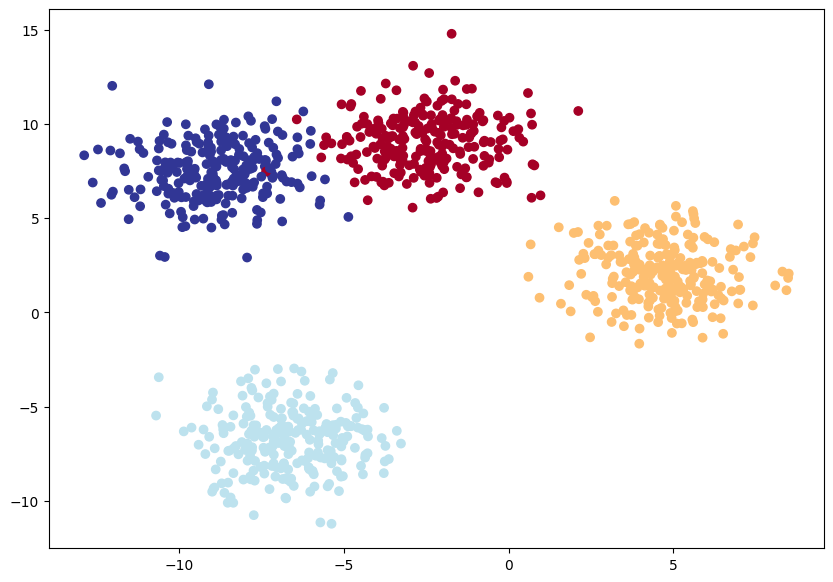

In [73]:
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap = plt.cm.RdYlBu)


In [229]:
class BlobModel(nn.Module):
    def __init__(self, X, y, k = 8 ):
        super().__init__() 
        self.relu=t.nn.ReLU()

        input_features = X.shape[1]
        output_features = len(np.unique(y))
        hidden_units = k 
        

        self.linear_layer_stack = nn.Sequential(
            nn.Linear(X.shape[1],k), 
            nn.ReLU(),
            nn.Linear(k,k), 
            nn.ReLU(),
        
            nn.Linear(k,len(np.unique(y))), 
        )
    
    def forward(self,X):
        return self.linear_layer_stack(X)

m0=BlobModel(X_train,y_train , k=8)
m0

BlobModel(
  (relu): ReLU()
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [80]:
y_train

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3, 2, 1, 1, 3, 2, 2, 2, 3, 1,
        3, 2, 3, 0, 1, 0, 0, 1, 1, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 3, 3, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 0, 2,
        3, 1, 1, 1, 2, 0, 0, 1, 2, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1,
        3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 2, 3, 1, 1, 2, 0, 3, 3, 2, 0, 2, 0, 3, 2,
        0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 3, 2, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2,
        3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 2, 0, 1,
        2, 2, 2, 3, 0, 1, 1, 0, 1, 2, 0, 3, 2, 1, 3, 2, 3, 0, 3, 1, 1, 2, 2, 2,
        2, 2, 2, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 3, 3, 3,
        1, 0, 0, 1, 0, 3, 2, 1, 0, 3, 0, 0, 3, 1, 0, 1, 0, 2, 2, 0, 0, 3, 3, 2,
        0, 2, 0, 3, 1, 3, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 3, 1, 1, 0, 2,
        2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 1, 0,
        2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 3,

In [4]:
m0

BlobModel(
  (relu): ReLU()
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [6]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
class_weights  = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train.numpy())
class_weights=t.tensor(class_weights, dtype=t.float)

loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.CrossEntropyLoss(weight=class_weights)
# class_weights

optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

In [213]:
# y_pred_props = t.softmax(y_log)
def reset(X,y, k =8):
    global optimizer
    t.manual_seed(42)
    m0 = BlobModel(X,y,k)
    optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)
    return m0

def accuracy_fn (y,pred):
    correct = t.eq(y,pred).sum().item()
    acc =  (correct / len(pred)) * 100
    return acc

In [8]:
# X_blob_train

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%



In [228]:
epochs = 100
t.manual_seed(42)
m0 = reset(X_train,y_train, k =8)

# m0 =  BlobModel(X_train,y_train)
optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

train_loss_list=[]
test_loss_list=[]
for epoch in range(epochs):
    m0.train()
    y_logits=m0(X_train)
    y_pred_props=t.softmax(y_logits,dim=1)
    y_pred=t.argmax(y_pred_props,dim=1)

    loss=loss_fn(y_logits,y_train)
    
    optimizer.zero_grad()    
    loss.backward()
    optimizer.step()

    acc= accuracy_fn(y_pred, y_train)
    train_loss_list.append(loss.detach().item())
    
    m0.eval()
    with t.inference_mode():
        y_logits=m0(X_test)
        y_pred_props=t.softmax(y_logits,dim=1)
        y_pred=t.argmax(y_pred_props,dim=1)
        
        test_loss=loss_fn(y_logits,y_test)
        test_acc= accuracy_fn(y_pred, y_test)
        # test_loss=loss.fn(y_pred_props,y_test)

        test_loss_list.append(test_loss.detach().item())
        if epoch%10==0:
            # print(f"Epoch: {epoch}  | Tr
            # ain Loss : {loss.detach().item():.5f} | Test Loss:  {test_loss.detach().item():.5f}  %")
            print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.3f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.3f}  , Acc: {test_acc:.2f} %") 


Epoch: 0  | Train Loss : 1.043 , Acc: 65.50 % | Test Loss:  0.579  , Acc: 95.50 %
Epoch: 10  | Train Loss : 0.144 , Acc: 99.12 % | Test Loss:  0.130  , Acc: 99.00 %
Epoch: 20  | Train Loss : 0.081 , Acc: 99.12 % | Test Loss:  0.072  , Acc: 99.50 %
Epoch: 30  | Train Loss : 0.059 , Acc: 99.12 % | Test Loss:  0.051  , Acc: 99.50 %
Epoch: 40  | Train Loss : 0.049 , Acc: 99.00 % | Test Loss:  0.041  , Acc: 99.50 %
Epoch: 50  | Train Loss : 0.043 , Acc: 99.00 % | Test Loss:  0.035  , Acc: 99.50 %
Epoch: 60  | Train Loss : 0.039 , Acc: 99.00 % | Test Loss:  0.031  , Acc: 99.50 %
Epoch: 70  | Train Loss : 0.036 , Acc: 99.00 % | Test Loss:  0.028  , Acc: 99.50 %
Epoch: 80  | Train Loss : 0.034 , Acc: 99.00 % | Test Loss:  0.026  , Acc: 99.50 %
Epoch: 90  | Train Loss : 0.033 , Acc: 99.12 % | Test Loss:  0.024  , Acc: 99.50 %


In [230]:
epochs = 100
t.manual_seed(42)
m0 = reset(X_train,y_train, k =8)

# m0 =  BlobModel(X_train,y_train)
optimizer = t.optim.SGD(params = m0.parameters(), lr = 0.1)

train_loss_list=[]
test_loss_list=[]
for epoch in range(epochs):
    m0.train()
    y_logits=m0(X_train)
    y_pred_props=t.softmax(y_logits,dim=1)
    y_pred=t.argmax(y_pred_props,dim=1)

    loss=loss_fn(y_logits,y_train)
    
    optimizer.zero_grad()    
    loss.backward()
    optimizer.step()

    acc= accuracy_fn(y_pred, y_train)
    train_loss_list.append(loss.detach().item())
    
    m0.eval()
    with t.inference_mode():
        y_logits=m0(X_test)
        y_pred_props=t.softmax(y_logits,dim=1)
        y_pred=t.argmax(y_pred_props,dim=1)
        
        test_loss=loss_fn(y_logits,y_test)
        test_acc= accuracy_fn(y_pred, y_test)
        # test_loss=loss.fn(y_pred_props,y_test)

        test_loss_list.append(test_loss.detach().item())
        if epoch%10==0:
            # print(f"Epoch: {epoch}  | Tr
            # ain Loss : {loss.detach().item():.5f} | Test Loss:  {test_loss.detach().item():.5f}  %")
            print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.3f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.3f}  , Acc: {test_acc:.2f} %") 


Epoch: 0  | Train Loss : 1.159 , Acc: 40.38 % | Test Loss:  1.076  , Acc: 48.00 %
Epoch: 10  | Train Loss : 0.645 , Acc: 96.75 % | Test Loss:  0.661  , Acc: 97.50 %
Epoch: 20  | Train Loss : 0.425 , Acc: 98.50 % | Test Loss:  0.431  , Acc: 100.00 %
Epoch: 30  | Train Loss : 0.253 , Acc: 99.12 % | Test Loss:  0.245  , Acc: 99.50 %
Epoch: 40  | Train Loss : 0.112 , Acc: 99.25 % | Test Loss:  0.102  , Acc: 99.50 %
Epoch: 50  | Train Loss : 0.066 , Acc: 99.25 % | Test Loss:  0.058  , Acc: 99.50 %
Epoch: 60  | Train Loss : 0.051 , Acc: 99.25 % | Test Loss:  0.043  , Acc: 99.50 %
Epoch: 70  | Train Loss : 0.043 , Acc: 99.25 % | Test Loss:  0.035  , Acc: 99.50 %
Epoch: 80  | Train Loss : 0.038 , Acc: 99.25 % | Test Loss:  0.030  , Acc: 99.50 %
Epoch: 90  | Train Loss : 0.035 , Acc: 99.25 % | Test Loss:  0.027  , Acc: 99.50 %


Text(0.5, 1.0, 'Loss curves')

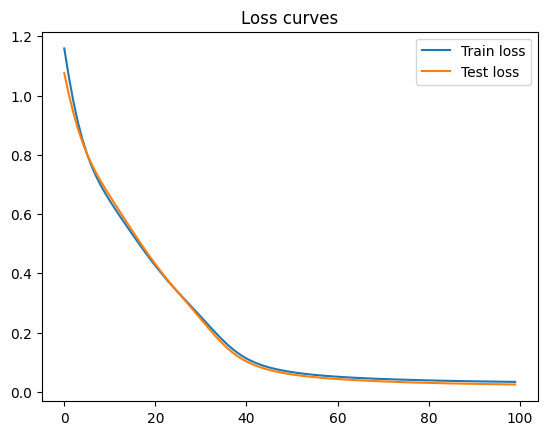

In [204]:
plt.plot(train_loss_list, label = "Train loss")
plt.plot(test_loss_list, label = "Test loss")
plt.legend()
plt.title("Loss curves")

In [14]:
m0.eval()
with t.inference_mode():
    y_logits = m0(X_blob_test)

In [18]:
y_pred_probs = t.softmax(y_logits,dim = 1)
y_pred = t.argmax(y_pred_probs, dim=1)
y_pred.shape, y_blob_test.shape

(torch.Size([200]), torch.Size([200]))

In [19]:
y_pred[:10], y_blob_test[:10]

(tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

Decision boundaries without non linearity, accuracy :  99.5 %


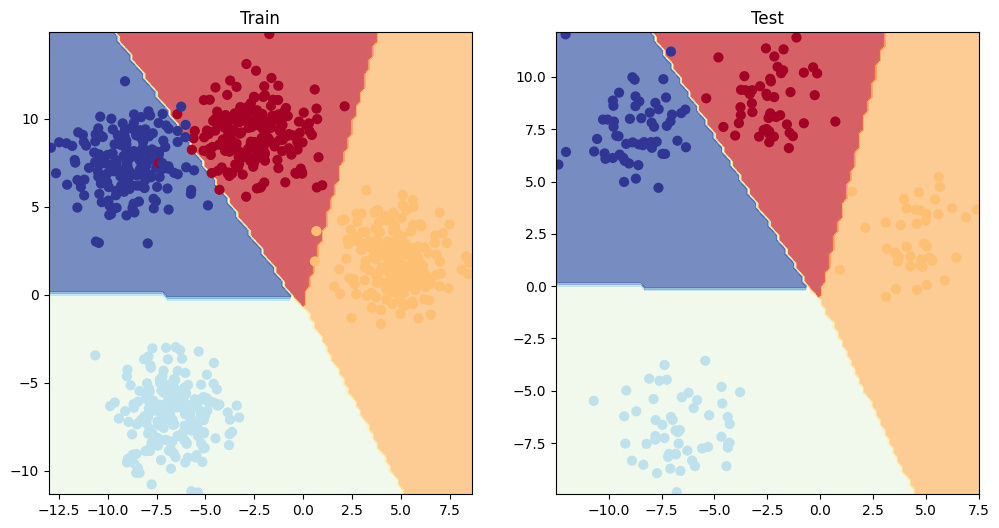

In [225]:
from helper_functions import plot_predictions, plot_decision_boundary

# m0 = reset(X_blob_train, y_blob_train)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(m0,X_test,y_test)
print("Decision boundaries without non linearity, accuracy : ",test_acc, "%")
# plot_decision_boundary(m0,X_test,y_test)

Decision boundaries with non-linearity, accuracy :  99.5


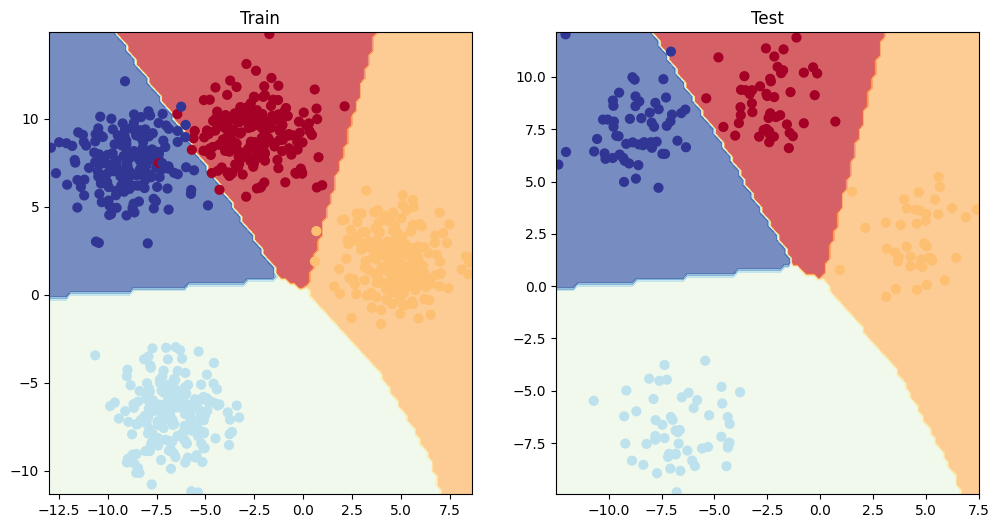

In [231]:
from helper_functions import plot_predictions, plot_decision_boundary

# m0 = reset(X_blob_train, y_blob_train)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(m0,X_test,y_test)
print("Decision boundaries with non-linearity, accuracy : ",test_acc)
# plot_decision_boundary(m0,X_test,y_test)

In [60]:
n=50
m=1
w=0.7
b=0.3

X=t.arange(0,1,1/n).unsqueeze(1)
X.shape
y=w * X + b


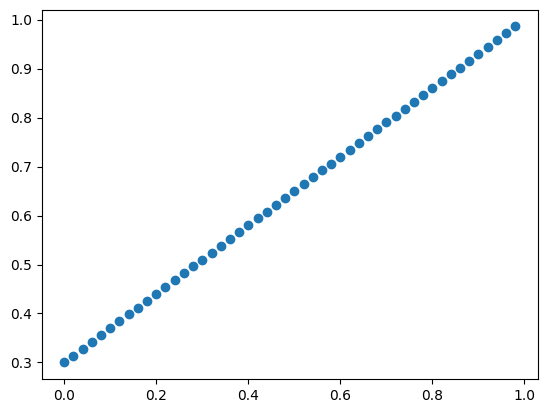

In [61]:
plt.scatter(X,y)

In [62]:
split_size = 0.2
n,m=X.shape
split_index = int(n*(1-split_size))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [69]:
y_train.shape
list(m0.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191],
         [ 0.2018],
         [-0.4869],
         [ 0.5873]], requires_grad=True),
 Parameter containing:
 tensor([ 0.8815, -0.7336,  0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2725,  0.0523, -0.1651,  0.0901, -0.1629, -0.0415, -0.1436,  0.2345],
         [-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
         [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
         [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
         [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
         [ 0.1118, -0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218],
         [ 0.1083, -0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178],
         [ 0.3402, -0.2918, -0.3507, -0.2766, -0.2378,  0

In [64]:
t.manual_seed(42)
m0= BlobModel(X_train, y_train)


In [66]:
epochs = 100
m0 = reset(X_train,y_train)

train_loss_list=[]
test_loss_list=[]
# y_train_long=t.tensor(y_train,dtype=t.long)
# y_test_long=t.tensor(y_test,dtype=t.long)
for epoch in range(epochs):
    m0.train()
    y_logits=m0(X_train)
    print(y_logits.shape, y_train.shape)
    break
    y_pred_props=t.softmax(y_logits,dim=1)
    y_pred=t.argmax(y_pred_props,dim=1)

    loss=loss_fn(y_logits,y_train)
    
    optimizer.zero_grad()    
    loss.backward()
    optimizer.step()

    acc= accuracy_fn(y_pred, y_train)
    train_loss_list.append(loss.detach().item())
    
    m0.eval()
    with t.inference_mode():
        y_logits=m0(X_test)
        y_pred_props=t.softmax(y_logits,dim=1)
        y_pred=t.argmax(y_pred_props,dim=1)
        
        test_loss=loss_fn(y_logits,y_test)
        test_acc= accuracy_fn(y_pred, y_test)
        # test_loss=loss.fn(y_pred_props,y_test)

        test_loss_list.append(test_loss.detach().item())
        if epoch%10==0:
            # print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.5f} | Test Loss:  {test_loss.detach().item():.5f}  %")
            print(f"Epoch: {epoch}  | Train Loss : {loss.detach().item():.5f} , Acc: {acc:.2f} % | Test Loss:  {test_loss.detach().item():.5f}  , Acc: {test_acc:.2f} %") 


torch.Size([40, 40]) torch.Size([40, 1])
